In [11]:
import pandas as pd

In [13]:
df=pd.read_csv(r"C:\Users\shiva\Downloads\Emotion_dataset\text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [15]:
df.shape

(416809, 3)

In [17]:
df.label.value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [19]:
#sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).
min_samples=14900
df_sad=df[df.label==0].sample(min_samples,random_state=2)
df_joy=df[df.label==1].sample(min_samples,random_state=2)
df_love=df[df.label==2].sample(min_samples,random_state=2)
df_anger=df[df.label==3].sample(min_samples,random_state=2)
df_fear=df[df.label==4].sample(min_samples,random_state=2)
df_surprise=df[df.label==5].sample(min_samples,random_state=2)
df_balanced=pd.concat([df_sad,df_joy,df_love,df_anger,df_fear,df_surprise],axis=0)


In [21]:
df_balanced.label.value_counts()

label
0    14900
1    14900
2    14900
3    14900
4    14900
5    14900
Name: count, dtype: int64

In [23]:
import spacy
nlp=spacy.load("en_core_web_sm")
def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
    

In [25]:
df_balanced['preprocessed_text']=df_balanced.text.apply(preprocess)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_balanced.preprocessed_text,df_balanced.label,test_size=0.2,random_state=0,stratify=df_balanced.label)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf=Pipeline([
    ('Vecorizer_BOW',CountVectorizer()),
    ('Random_Forest',RandomForestClassifier())
])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2980
           1       0.90      0.82      0.86      2980
           2       0.84      0.93      0.89      2980
           3       0.89      0.90      0.89      2980
           4       0.85      0.83      0.84      2980
           5       0.87      0.91      0.89      2980

    accuracy                           0.88     17880
   macro avg       0.88      0.88      0.88     17880
weighted avg       0.88      0.88      0.88     17880



In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
clf2=Pipeline([
    ('tfidf_vectorizer',TfidfVectorizer()),
    ('Random_Forest',RandomForestClassifier())
])
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2980
           1       0.90      0.83      0.86      2980
           2       0.85      0.93      0.89      2980
           3       0.89      0.90      0.90      2980
           4       0.84      0.84      0.84      2980
           5       0.87      0.91      0.89      2980

    accuracy                           0.88     17880
   macro avg       0.88      0.88      0.88     17880
weighted avg       0.88      0.88      0.88     17880



In [57]:
from sklearn.metrics import r2_score

In [59]:
print(r2_score(y_test,y_pred2))

0.8169894534995206


In [61]:
print(r2_score(y_test,y_pred))

0.811294343240652


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf3=Pipeline([
    ('TfidVectorizer',TfidfVectorizer()),
    ('Multinomial_NB',MultinomialNB())
])
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2980
           1       0.90      0.82      0.86      2980
           2       0.85      0.93      0.89      2980
           3       0.89      0.90      0.89      2980
           4       0.84      0.83      0.84      2980
           5       0.87      0.91      0.89      2980

    accuracy                           0.88     17880
   macro avg       0.88      0.88      0.88     17880
weighted avg       0.88      0.88      0.88     17880



In [75]:
print(r2_score(y_test,y_pred))

0.811294343240652


In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

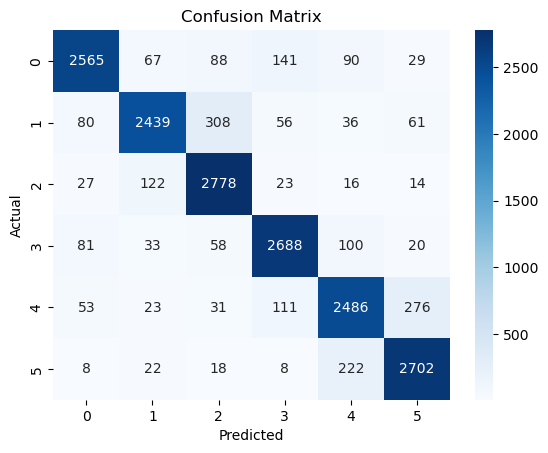

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [71]:
raw_text = ["How wonderful is this life"]  # Provide the raw text input for prediction
prediction = clf.predict(raw_text)
print("Prediction:", prediction)

Prediction: [1]


In [57]:
label={0:'sadness',1: 'joy',2: 'love',3: 'anger',4: 'fear',5: 'surprise'}

In [73]:
print(label[prediction[0]])

joy


In [93]:
txtlst=["I got shocked when he wished me","I married my favorite person","I am afraid to say that you failed","I don't want to do this"]
# txt="I got shocked when he wished me"
for txt in txtlst:
    raw_text = [txt]  
    prediction = clf.predict(raw_text)
    print(txt,"| Predicted emotion:",label[prediction[0]])

I got shocked when he wished me | Predicted emotion: surprise
I married my favorite person | Predicted emotion: anger
I am afraid to say that you failed | Predicted emotion: fear
I don't want to do this | Predicted emotion: sadness
